<a href="https://colab.research.google.com/github/ImmaculateOkoruwa/Advanced_Python_for_Reservoirs_Production_and_Petrophysics/blob/main/Edvantage_PE_Day_3_Part_2_Well_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/yohanesnuwara/pyMRST

Cloning into 'pyMRST'...
remote: Enumerating objects: 342, done.
remote: Counting objects: 100% (210/210), done.
remote: Compressing objects: 100% (128/128), done.
remote: Total 342 (delta 110), reused 159 (delta 80), pack-reused 132 (from 1)
Receiving objects: 100% (342/342), 2.14 MiB | 11.00 MiB/s, done.
Resolving deltas: 100% (156/156), done.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append('/content/pyMRST')



In [ ]:
import pymrst
from pymrst_units import *

In [ ]:
pymrst.setup()

In [ ]:
# setup model
model = dict({"name": "spe10", 'nlayer': 10, "startlayer": 4})

In [ ]:
# setup rock property
rock = dict({"c": 1e-6*(1/1e+5),
             "p_r": 200*1e+5})

In [ ]:
# fluid property
fluid = dict({"type": ["water", "oil"],
              "mu": [1*centi()*poise(), 1*centi()*poise()],
              "rho": [1000, 850],
              "n": [2, 2]})

fluid

{'type': ['water', 'oil'],
 'mu': [0.001, 0.001],
 'rho': [1000, 850],
 'n': [2, 2]}

In [ ]:
# Boundary
bc_front = dict({"type": "fluxside", "value": 0})
bc_back = dict({"type": "fluxside", "value": 0})
bc_left = dict({"type": "fluxside", "value": 0})
bc_right = dict({"type": "pside", "value": 0})

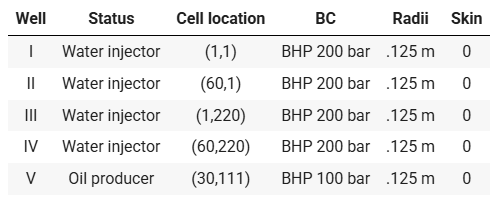

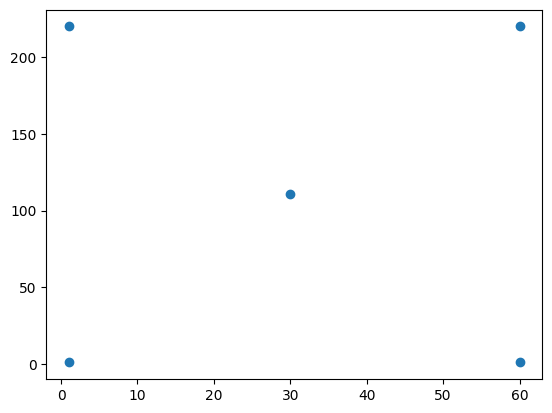

In [ ]:
# well
locs = np.array([[1,60,1,60,30],
                 [1,1,220,220,111],
                 [1,1,1,1,1]])

x = locs[0,:]
y = locs[1,:]

plt.scatter(x,y)

Water --> [1,0]
Oil --> [0,1]

In [ ]:
types = np.full(5, "bhp")
values = np.array([200,200,200,200,100])
radii = np.full(5, .125)*meter()
skins = np.full(5, 0)
directions = np.full(5, None)
phases = np.array([[1,0],[1,0],[1,0],[1,0],[0,1]])

well = dict({"cellx_loc": locs[0,:],
             "celly_loc": locs[1,:],
             "cellz_loc": locs[2,:],
             "type": types,
             "value": values,
             "phase": phases,
             "radius": radii,
             "skin": skins,
             "direction": directions})

well

{'cellx_loc': array([ 1, 60,  1, 60, 30]),
 'celly_loc': array([  1,   1, 220, 220, 111]),
 'cellz_loc': array([1, 1, 1, 1, 1]),
 'type': array(['bhp', 'bhp', 'bhp', 'bhp', 'bhp'], dtype='<U3'),
 'value': array([200, 200, 200, 200, 100]),
 'phase': array([[1, 0],
        [1, 0],
        [1, 0],
        [1, 0],
        [0, 1]]),
 'radius': array([0.125, 0.125, 0.125, 0.125, 0.125]),
 'skin': array([0, 0, 0, 0, 0]),
 'direction': array([None, None, None, None, None], dtype=object)}

In [ ]:
# Time step
numSteps, totTime = 50, 20*365 # 20 years
steps = [2, 10, 20, 50]

In [ ]:
# Run program to read input
pymrst.model_input(model, fluid, well, bc_front, bc_back, bc_left, bc_right,
                   numSteps, totTime, steps)


In [ ]:
# make a function in python that converts
# Water --> [1,0]
# Oil --> [0,1]

def convert_phase(phase):
  if "water":
    return [1,0]
  elif "oil":
    return [0,1]

phase_names = ["water", "oil", "water", "oil", "oil"]
print([convert_phase(i) for i in phase_names])

[[1, 0], [1, 0], [1, 0], [1, 0], [1, 0]]


In [ ]:
pymrst.oilwater_2phase()

    addpaths at line 234 column 1
    oilwater_2phase at line 2 column 1
    run at line 78 column 7
    _pyeval at line 57 column 30

    addpaths at line 268 column 1
    oilwater_2phase at line 2 column 1
    run at line 78 column 7
    _pyeval at line 57 column 30

    addpaths at line 271 column 1
    oilwater_2phase at line 2 column 1
    run at line 78 column 7
    _pyeval at line 57 column 30

    addpaths at line 273 column 1
    oilwater_2phase at line 2 column 1
    run at line 78 column 7
    _pyeval at line 57 column 30

    addpaths at line 277 column 1
    oilwater_2phase at line 2 column 1
    run at line 78 column 7
    _pyeval at line 57 column 30

    addpaths at line 278 column 1
    oilwater_2phase at line 2 column 1
    run at line 78 column 7
    _pyeval at line 57 column 30

    addpaths at line 279 column 1
    oilwater_2phase at line 2 column 1
    run at line 78 column 7
    _pyeval at line 57 column 30

    addpaths at line 280 column 1
    oilwater_2phase a

In [ ]:
model["nlayer"]

10

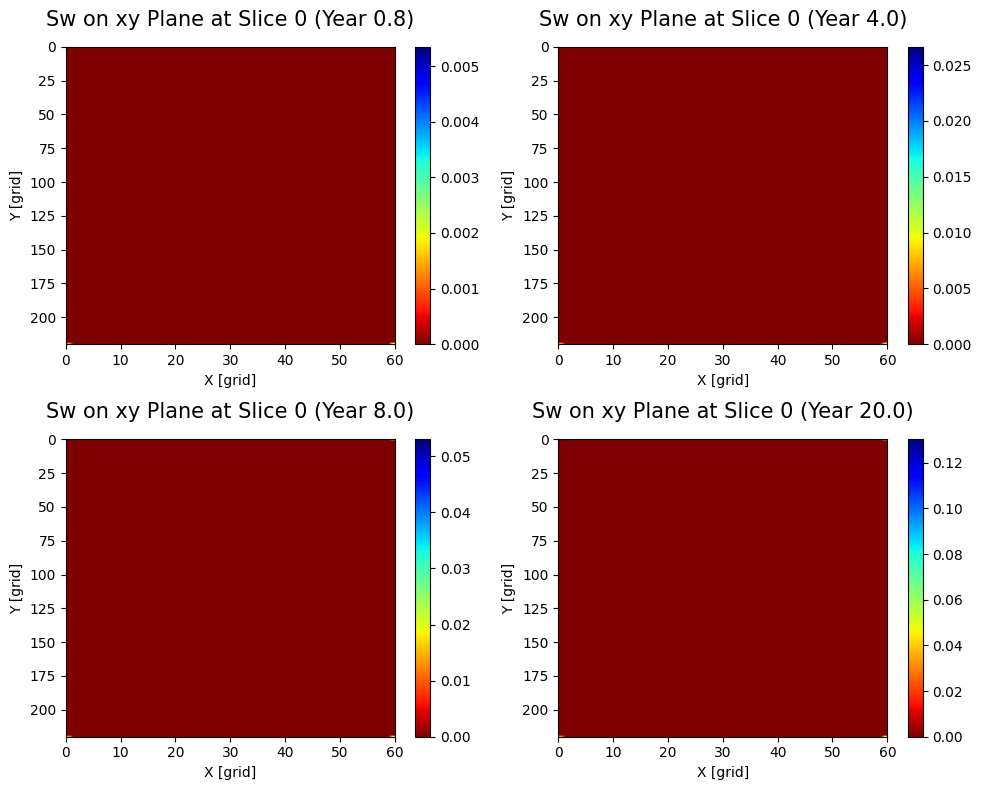

In [ ]:
from pymrst_units import *

# Specify dimension
nlayer = model["nlayer"]
dimension = (60,220,nlayer)

# Plane and layer number
plane, position = "xy", 0

numSteps, totTime = 50, 20*365 # day
steps = [2, 10, 20, 50]

# Plot Sw for every timestep
plt.figure(figsize=(10,8))

for i in range(len(steps)):
  directory = "/content/result_oilwater_2phase/"
  filename = "Sw{}.mat".format(steps[i])

  # Get cell data
  cube = pymrst.getCellData(directory, filename, dimension=dimension)

  # Plot for every timestep
  days = totTime / numSteps * steps[i]
  years = days * day() / year()

  plt.subplot(2,2,i+1)
  pymrst.plotCellData(cube, plane, position, cmap="jet_r")
  plt.title("Sw on {} Plane at Slice {} (Year {:.1f})".format(plane, position, years),
            size=15, pad=15)

plt.tight_layout()
plt.show()

## Inverted 5 spot injection

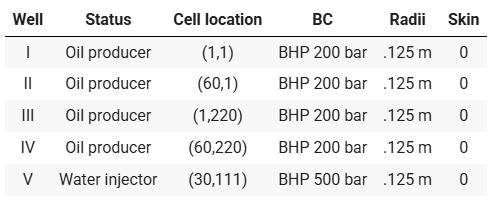

In [ ]:
# well
locs = np.array([[1,60,1,60,30],
                 [1,1,220,220,111],
                 [1,1,1,1,1]])

types = np.full(5, "bhp")
values = np.array([200,200,200,200,500])
radii = np.full(5, .125)*meter()
skins = np.full(5, 0)
directions = np.full(5, None)

phase_names = ["oil", "oil", "oil", "oil", "water"]
phase = [convert_phase(i) for i in phase_names]

well = dict({"cellx_loc": locs[0,:],
             "celly_loc": locs[1,:],
             "cellz_loc": locs[2,:],
             "type": types,
             "value": values,
             "phase": phases,
             "radius": radii,
             "skin": skins,
             "direction": directions})

well

{'cellx_loc': array([ 1, 60,  1, 60, 30]),
 'celly_loc': array([  1,   1, 220, 220, 111]),
 'cellz_loc': array([1, 1, 1, 1, 1]),
 'type': array(['bhp', 'bhp', 'bhp', 'bhp', 'bhp'], dtype='<U3'),
 'value': array([200, 200, 200, 200, 500]),
 'phase': array([[1, 0],
        [1, 0],
        [1, 0],
        [1, 0],
        [0, 1]]),
 'radius': array([0.125, 0.125, 0.125, 0.125, 0.125]),
 'skin': array([0, 0, 0, 0, 0]),
 'direction': array([None, None, None, None, None], dtype=object)}

In [ ]:
# Time step
numSteps, totTime = 50, 20*365 # 20 years
steps = [2, 10, 20, 50]

In [ ]:
# Execute program to read input
pymrst.model_input(model, fluid, well, bc_front, bc_back, bc_left, bc_right,
                   numSteps, totTime, steps)

In [ ]:
pymrst.oilwater_2phase()

    addpaths at line 234 column 1
    oilwater_2phase at line 2 column 1
    run at line 78 column 7
    _pyeval at line 57 column 30

    addpaths at line 268 column 1
    oilwater_2phase at line 2 column 1
    run at line 78 column 7
    _pyeval at line 57 column 30

    addpaths at line 271 column 1
    oilwater_2phase at line 2 column 1
    run at line 78 column 7
    _pyeval at line 57 column 30

    addpaths at line 273 column 1
    oilwater_2phase at line 2 column 1
    run at line 78 column 7
    _pyeval at line 57 column 30

    addpaths at line 277 column 1
    oilwater_2phase at line 2 column 1
    run at line 78 column 7
    _pyeval at line 57 column 30

    addpaths at line 278 column 1
    oilwater_2phase at line 2 column 1
    run at line 78 column 7
    _pyeval at line 57 column 30

    addpaths at line 279 column 1
    oilwater_2phase at line 2 column 1
    run at line 78 column 7
    _pyeval at line 57 column 30

    addpaths at line 280 column 1
    oilwater_2phase a

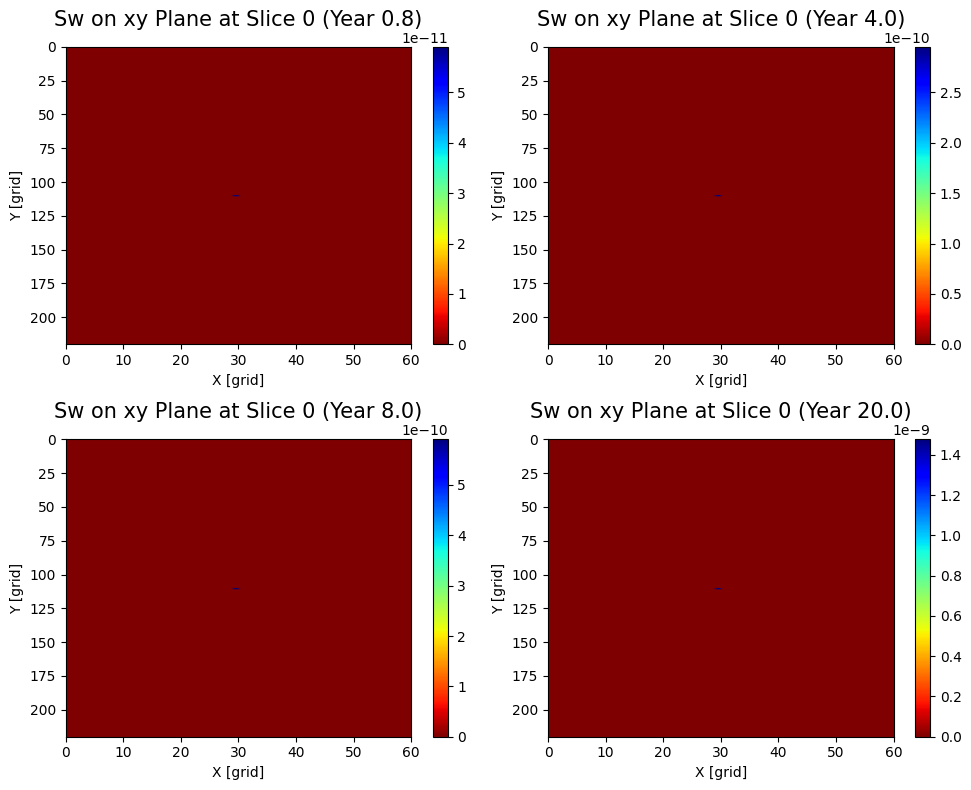

In [ ]:
from pymrst_units import *

# Specify dimension
nlayer = model["nlayer"]
dimension = (60,220,nlayer)

# Plane and layer number
plane, position = "xy", 0

numSteps, totTime = 50, 20*365 # day
steps = [2, 10, 20, 50]

# Plot Sw for every timestep
plt.figure(figsize=(10,8))

for i in range(len(steps)):
  directory = "/content/result_oilwater_2phase/"
  filename = "Sw{}.mat".format(steps[i])

  # Get cell data
  cube = pymrst.getCellData(directory, filename, dimension=dimension)

  # Plot for every timestep
  days = totTime / numSteps * steps[i]
  years = days * day() / year()

  plt.subplot(2,2,i+1)
  pymrst.plotCellData(cube, plane, position, cmap="jet_r")
  plt.title("Sw on {} Plane at Slice {} (Year {:.1f})".format(plane, position, years),
            size=15, pad=15)

plt.tight_layout()
plt.show()